Susan's workhorse notebook for looking at a variety of fields at two different times.

# Compare Two

#### Set-up and Read In

In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
from matplotlib import font_manager
import netCDF4 as NC
import numpy as np
import cmocean.cm as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import geo_tools
from salishsea_tools import viz_tools
from salishsea_tools import teos_tools
from salishsea_tools import tidetools

In [2]:
# Set up the two time slices here.  date1 and date2 are using for headings.  time1 and time2 are
# the time counters in the files, name1 and name2 are the files, with resultsloc their directories

date1 = '201803p'
time1 = 9*24+21
name1 = 'SalishSea_1h_20170406_20170415_grid_'
#extra1 = '_20170428-20170428'
extra1 = ''
resultsloc1 = '/data/sallen/results/MEOPAR/mudflats/06apr17/'
#mesh_mask_1 = NC.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10allreduceviscosity/mesh_mask.nc')#
#resultsloc1 = '/results/SalishSea/hindcast/15apr17/'
    
date2 = '201803p2'
time2 = 9*24+21
name2 =  'SalishSea_1h_20170406_20170415_grid_'
extra2 = extra1
#extra2 = ''
#name2 = name1
#resultsloc2 = '/results/SalishSea/hindcast/23aug17/'
resultsloc2 = '/data/sallen/results/MEOPAR/mudflats/201803p2/'
#mesh_mask_1 = NC.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
mesh_mask_1 = NC.Dataset('/ocean/sallen/allen/research/MEOPAR/sea_initial/mesh_mask201803p.nc')
#
#mesh_mask_2 = NC.Dataset('/ocean/sallen/allen/research/MEOPAR/grid/mesh_mask201702.nc')
mesh_mask_2 = mesh_mask_1
#resultsloc2 = '/results/SalishSea/hindcast/09oct14/'
#grid1 = NC.Dataset(
#        '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_downonegrid2.nc',
#        'r')
#grid1 = NC.Dataset(
#        '/ocean/sallen/allen/research/MEOPAR/grid/bathymetry_201702.nc',
#        'r')
grid1 = NC.Dataset('/home/sallen/MEOPAR/sea_initial/bathymetry_201803p.nc')
grid2 = grid1

In [3]:
bathy1 = grid1.variables['Bathymetry'][:, :]
X1 = grid1.variables['nav_lon'][:, :]
Y1 = grid1.variables['nav_lat'][:, :]

bathy2 = grid2.variables['Bathymetry'][:, :]
X2 = grid2.variables['nav_lon'][:, :]
Y2 = grid2.variables['nav_lat'][:, :]

In [4]:
# Tracer files 1
print (resultsloc1+name1+'T'+extra1+'.nc')
fT1 = NC.Dataset(resultsloc1+name1+'T'+extra1+'.nc','r')
print (fT1.variables['sossheig'].shape)
eta1 = fT1.variables['sossheig'][time1,:]
sal1 = fT1.variables['vosaline'][time1,:]
temp1 = fT1.variables['votemper'][time1,:]
depth = fT1.variables['deptht'][:]
lats = fT1.variables['nav_lat'][:]
lons = fT1.variables['nav_lon'][:]
tmask1 = 1-mesh_mask_1.variables['tmask'][:]
e3t1 = mesh_mask_1.variables['e3t_0'][:]


/data/sallen/results/MEOPAR/mudflats/06apr17/SalishSea_1h_20170406_20170415_grid_T.nc
(240, 898, 398)


In [5]:
# Tracer Files 2
print (resultsloc2+name2+'T'+extra2+'.nc')
fT2 = NC.Dataset(resultsloc2+name2+'T'+extra2+'.nc','r')
print (fT2.variables['sossheig'].shape)
eta2 = fT2.variables['sossheig'][time2,:]
sal2 = fT2.variables['vosaline'][time2,:]
temp2 = fT2.variables['votemper'][time2,:]
tmask2 = 1-mesh_mask_2.variables['tmask'][:]
e3t2 = mesh_mask_2.variables['e3t_0'][:]


/data/sallen/results/MEOPAR/mudflats/201803p2/SalishSea_1h_20170406_20170415_grid_T.nc
(240, 898, 398)


In [6]:
# depth thicknesses
deldepth = np.zeros(40)
deldepth[0] = 0.5*(depth[0]+depth[1])
deldepth[1:39] = 0.5*(depth[1:39]+depth[2:40])-0.5*(depth[0:38]+depth[1:39])

In [7]:
# mask salinity, temperature and surface height (eta) arrays
sal1_masked = np.ma.array(sal1, mask=tmask1)
temp1_masked = np.ma.array(temp1, mask=tmask1)
print (tmask1.shape)
eta1_masked = np.ma.array(eta1,mask=tmask1[0, 0])
print(np.unravel_index(np.argmin(eta1_masked), (898, 398)))
print(np.min(eta1_masked))
sal2_masked = np.ma.array(sal2,mask=tmask2)
temp2_masked = np.ma.array(temp2,mask=tmask2)
eta2_masked = np.ma.array(eta2,mask=tmask2[0, 0])

(1, 40, 898, 398)
(71, 148)
-1.77438


#### Full Domain Surface Height Plot and Difference

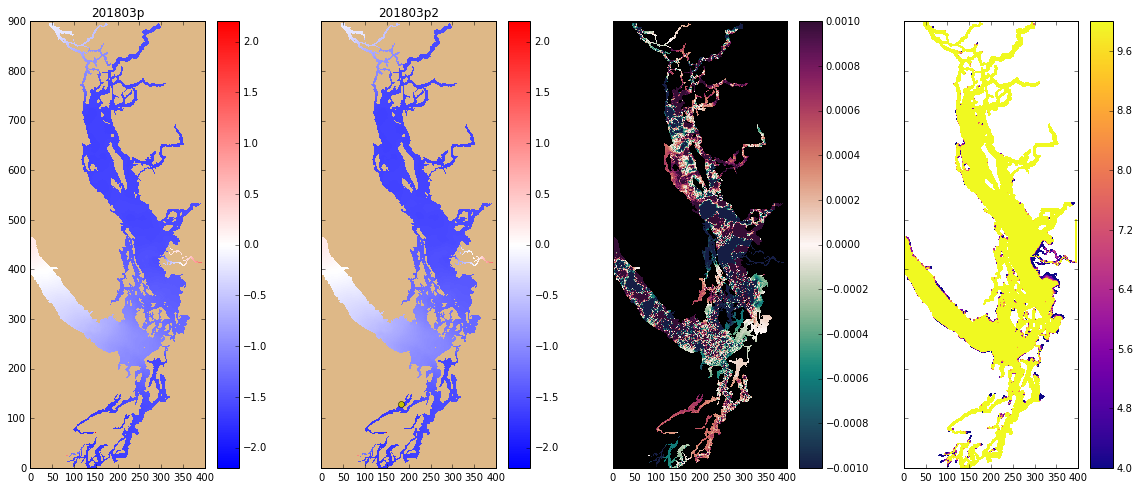

In [8]:
vmax = 2.2
fig, axs = plt.subplots(1, 4, figsize=(20,8), sharey=True)
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(eta1_masked,cmap=cmap, vmax=vmax, vmin=-vmax)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(eta2_masked,cmap=cmap, vmax=vmax, vmin=-vmax)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
# third one
viz_tools.set_aspect(axs[2])
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('black')
mesh = axs[2].pcolormesh(eta2_masked-eta1_masked,cmap=cmap, vmax = 0.001, vmin =-0.001)
cbar=fig.colorbar(mesh, ax=axs[2])
# bathy
viz_tools.set_aspect(axs[3])
mesh = axs[3].pcolormesh(bathy1,cmap='plasma', vmax=10, vmin=4)
cbar=fig.colorbar(mesh, ax=axs[3])

axs[1].plot(182-1+0.5, 129-1+0.5, 'yo')

2.55932


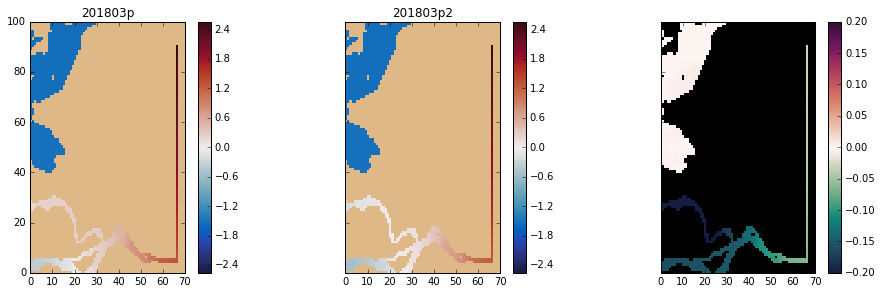

In [9]:
vmax = eta2_masked[500, 394]
ii=410; di=100; jj=328; dj=70
fig, axs = plt.subplots(1, 3, figsize=(16,4.5), sharey=True)
cmap = plt.get_cmap(cm.balance)
cmap.set_bad('burlywood')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(eta1_masked[ii:ii+di, jj:jj+dj],cmap=cmap, vmax=vmax, vmin=-vmax)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(eta2_masked[ii:ii+di, jj:jj+dj],cmap=cmap, vmax=vmax, vmin=-vmax)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
# third one
viz_tools.set_aspect(axs[2])
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('black')
mesh = axs[2].pcolormesh(eta2_masked[ii:ii+di, jj:jj+dj]-eta1_masked[ii:ii+di, jj:jj+dj],cmap=cmap, vmax = 0.2, vmin =-0.2)
cbar=fig.colorbar(mesh, ax=axs[2])
print (vmax)

#### Plume Region Surface Temperature and Salinity Plots

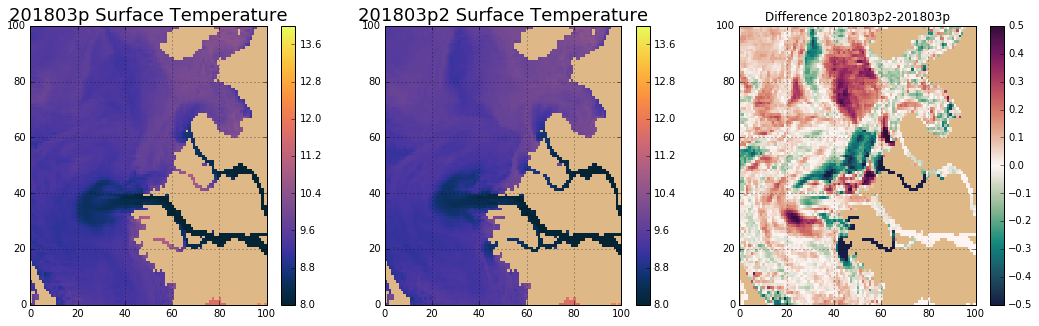

In [10]:
level = 0
vmax = 14
vmin = 8
iin = 390; iix = 490; jjn = 250; jjx = 350

fig, ax = plt.subplots(1, 3, figsize=(18,5))
cmap = plt.get_cmap(cm.thermal)
cmap.set_bad('burlywood')
mesh = ax[0].pcolormesh(temp1_masked[level, iin:iix, jjn:jjx], cmap=cmap, vmax = vmax, vmin = vmin)
ax[0].set_title(date1+' Surface Temperature',fontsize=18)
ax[0].grid()
fig.colorbar(mesh, ax=ax[0])
#cbar=fig.colorbar(mesh, ax=ax[1])
ax[0].set_axis_bgcolor('burlywood')
#ax[0].set_xlabel('Latitude',fontsize=16)
#ax[0].set_ylabel('Longitude',fontsize=16)
#cbar.set_label('Salinity',fontsize=16)
ax[1].set_title(date2+' Surface Temperature',fontsize=18)
mesh = ax[1].pcolormesh(temp2_masked[level, iin:iix, jjn:jjx],cmap=cmap, vmax = vmax, vmin = vmin)
fig.colorbar(mesh, ax=ax[1])
ax[1].grid()
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('burlywood')
mesh = ax[2].pcolormesh(temp2_masked[level, iin:iix, jjn:jjx]-temp1_masked[level, iin:iix, jjn:jjx], cmap = cmap, 
                        vmax = 0.5, vmin = -0.5)
ax[2].grid()
fig.colorbar(mesh, ax=ax[2])
ax[2].set_title('Difference '+date2+'-'+date1);

##### Salinity Whole Domain #####

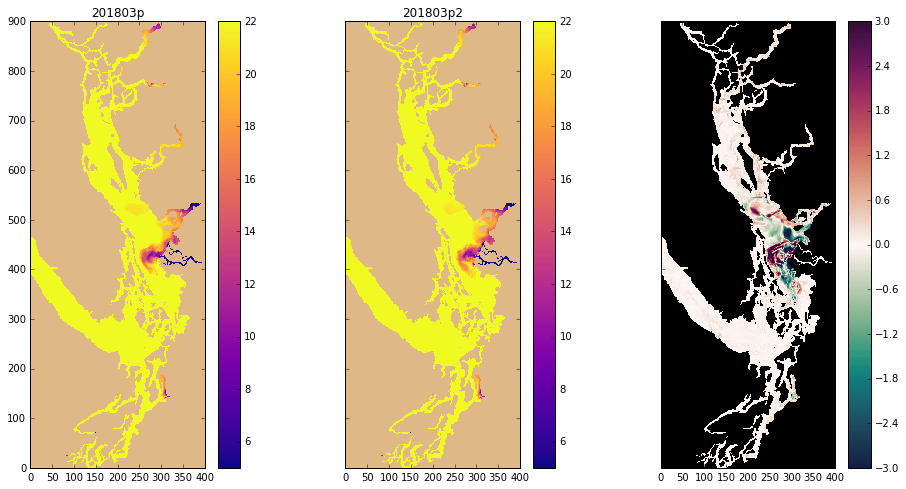

In [11]:
vmax = 22.
level = 1
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('plasma')
cmap.set_bad('burlywood')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(sal1_masked[level], cmap=cmap, vmax=vmax, vmin=5)
axs[0].set_title(date1)
cbar = fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(sal2_masked[level], cmap=cmap, vmax=vmax, vmin=5)
axs[1].set_title(date2)
cbar = fig.colorbar(mesh, ax=axs[1])
# third one
viz_tools.set_aspect(axs[2])
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('black')
mesh = axs[2].pcolormesh(
    sal2_masked[level] - sal1_masked[level], cmap=cmap, vmax=3, vmin=-3)
cbar = fig.colorbar(mesh, ax=axs[2])

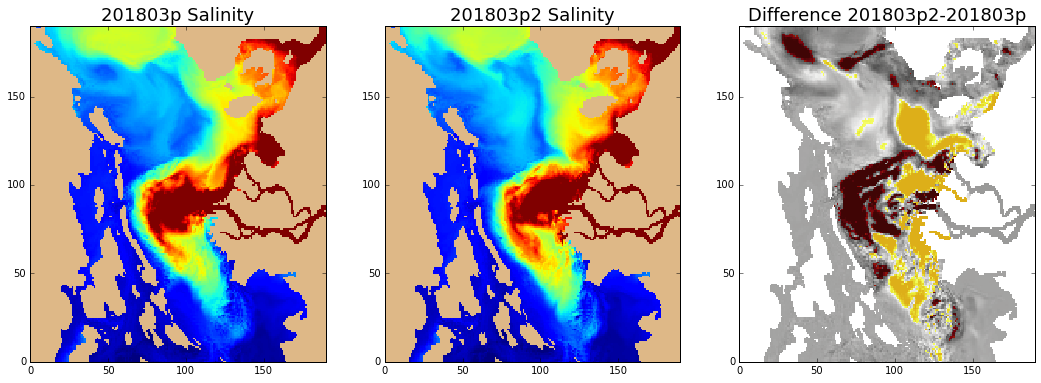

In [15]:
level = 1
vmax = 30
vmin = 15
iin = 340; iix = 530; jjn = 180; jjx = 370
#slicex = np.arange(200,400)
#slicey = np.arange(300,600)
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
cmap = plt.get_cmap('jet_r')
cmap.set_bad('burlywood')
mesh = ax[0].pcolormesh(sal1_masked[level, iin:iix, jjn:jjx],cmap=cmap, vmax=vmax, vmin=vmin)
ax[0].set_title(date1+' Salinity',fontsize=18)


#cbar=fig.colorbar(mesh, ax=ax[0])
ax[0].set_axis_bgcolor('burlywood')



ax[1].set_title(date2+' Salinity',fontsize=18)
ax[1].pcolormesh(sal2_masked[level, iin:iix, jjn:jjx],cmap=cmap, vmax=vmax, vmin=vmin)

cmap = plt.get_cmap(cm.curl)
cmap.set_bad('burlywood')

mesh = ax[2].pcolormesh(sal2_masked[level, iin:iix, jjn:jjx]-
                        teos_tools.psu_teos(sal1_masked[level, iin:iix, jjn:jjx]), 
                        cmap = cm.oxy_r, vmax = 2, vmin = -2)

#fig.colorbar(mesh, ax=ax[2])
ax[2].set_title('Difference '+date2+'-'+date1, fontsize=18)
#st = fig.suptitle("Oct 18, 2014, Daily Average", fontsize=18)
#st.set_y(0.95)
for ax in [ax[0], ax[1], ax[2]]:
    viz_tools.set_aspect(ax)
    ax.set_ylim((0, iix-iin))
    ax.set_xlim((0, jjx-jjn))
fig.subplots_adjust(top=0.80)

### Salinity in Plume Region ###

(390, 485)

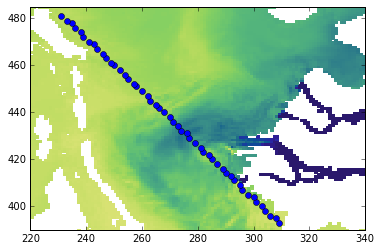

In [13]:
slats = np.linspace(49, 49.2, num=50, endpoint=True)
slons = np.linspace(-123.1,-123.8, num=50, endpoint=True)
ylat = np.zeros((50), dtype=np.int64)
xlon = np.zeros((50), dtype=np.int64)
for i, lat in enumerate(slats):
        lon = slons[i]
        ylat[i], xlon[i] = geo_tools.find_closest_model_point(lon, lat, X2, Y2)
plt.plot(xlon,ylat,'o')
plt.pcolormesh(sal2_masked[2], cmap=cm.haline)
plt.xlim((220, 340))
plt.ylim((390, 485))

[393 395 396 398 400 402 404 405 407 409 411 413 414 416 418 420 422 423
 425 427 429 431 432 434 436 438 440 442 443 445 447 449 451 452 454 456
 458 460 461 463 465 467 469 470 472 474 476 478 479 481]


(-124, -123)

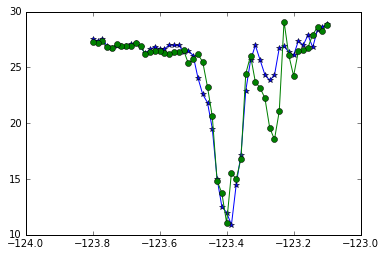

In [14]:
print (ylat)
plt.plot(slons, sal1_masked[2, ylat, xlon], 'b*-');
plt.plot(slons, sal2_masked[2, ylat, xlon], 'go-')
plt.xlim((-124,-123))

0.5


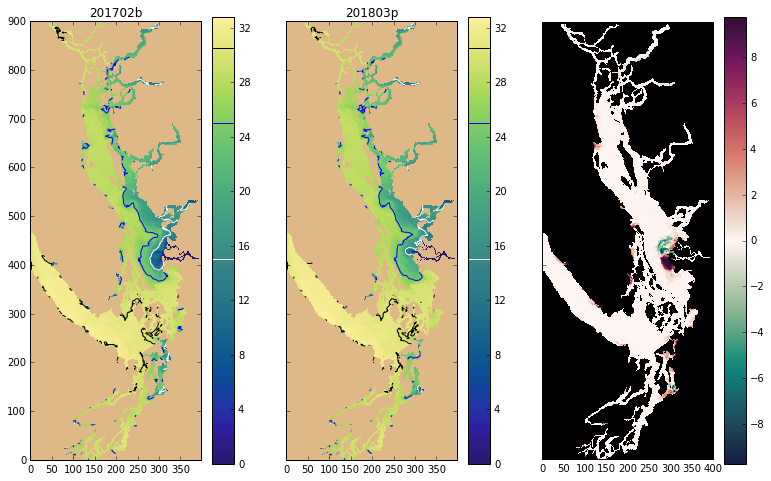

In [21]:
level = 0
vs = (15,25,30.5)
fig, axs = plt.subplots(1, 3, figsize=(13,8), sharey=True)
cmap = plt.get_cmap(cm.haline)
cmap.set_bad('burlywood')
nicecolours = ('white','blue','black')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(sal1_masked[level],cmap=cmap)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(sal1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(sal2_masked[level],cmap=cmap)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(sal2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
vmax = np.max(sal2_masked[level]-sal1_masked[level])
vmin = np.min(sal2_masked[level]-sal1_masked[level])
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(sal2_masked[level]-sal1_masked[level],cmap=cmap,vmax=0.5*vmax,vmin=-0.5*vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
print (depth[level])

0.5


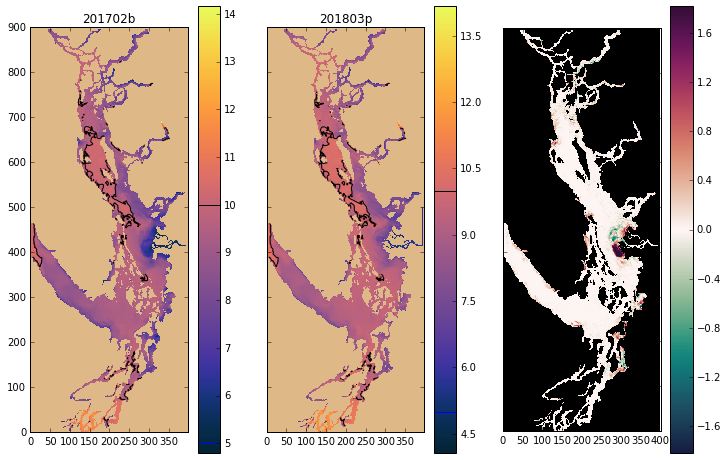

In [22]:
level = 0
vs = (0,5,10)
fig, axs = plt.subplots(1, 3, figsize=(12,8), sharey=True)
cmap = plt.get_cmap(cm.thermal)
cmap.set_bad('burlywood')
nicecolours = ('white','blue','black')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(temp1_masked[level],cmap=cmap)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(temp1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(temp2_masked[level],cmap=cmap)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(temp2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
vmax = np.max(temp2_masked[level]-temp1_masked[level])
vmin = np.min(temp2_masked[level]-temp1_masked[level])
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(temp2_masked[level]-temp1_masked[level],cmap=cmap,vmax=0.5*vmax,vmin=-0.5*vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
print (depth[level])

#### Now Read in the Velocities and Mask Them

In [ ]:
fU1 = NC.Dataset(resultsloc1+name1+'U'+extra1+'.nc','r')
ugrid1 = fU1.variables['vozocrtx']
uvel1 = ugrid1[time1,:]
umask1 = 1 - mesh_mask_1['umask'][:]
uvel1_masked = np.ma.array(uvel1, mask=umask1)
fV1 = NC.Dataset(resultsloc1+name1+'V'+extra1+'.nc','r')
vgrid1 = fV1.variables['vomecrty']
vvel1 = vgrid1[time1,:]
vmask1 = 1 - mesh_mask_1['vmask'][:]
vvel1_masked = np.ma.array(vvel1, mask=vmask1)
print (uvel1.shape, time1)

In [ ]:
fU2 = NC.Dataset(resultsloc2+name2+'U'+extra2+'.nc','r')
ugrid2 = fU2.variables['vozocrtx']
print (ugrid2.shape, time2)
uvel2 = ugrid2[time2,:]
umask2 = 1 - mesh_mask_2['umask'][:]
uvel2_masked = np.ma.array(uvel2, mask=umask2)
fV2 = NC.Dataset(resultsloc2+name2+'V'+extra2+'.nc','r')
vgrid2 = fV2.variables['vomecrty']
vvel2 = vgrid2[time2,:]
vmask2 = 1 - mesh_mask_2['vmask'][:]
vvel2_masked = np.ma.array(vvel2, mask=vmask2)
print (uvel2.shape, time2)

In [ ]:
# Fraser River Flux
print (np.sum(vvel1_masked[0:, 450, 394] * e3t1[0, 0:, 450, 394] * (1 + eta1[450, 394] / bathy1[450, 394])))
print (np.sum(vvel2_masked[0:, 450, 394] * e3t2[0, 0:, 450, 394] * (1 + eta2[450, 394] / bathy2[450, 394])))
print (vvel1_masked[0:, 450, 394] * e3t1[0, 0:, 450, 394] * (1 + eta1[450, 394] / bathy1[450, 394]))
print (vvel2_masked[0:, 450, 394] * e3t2[0, 0:, 450, 394] * (1 + eta2[450, 394] / bathy2[450, 394]))

#### "North-South" Velocities with High Velocities Emphasized

In [ ]:
level = 0
fig, axs = plt.subplots(1, 3, figsize=(13,8), sharey=True)
cmap = plt.get_cmap(cm.tempo)
cmap.set_bad('burlywood')
nicecolours = ('white','red')  # these tend to emphasize little patches of high velocities
vmax1 = np.max(vvel1_masked[level])
vmax2 = np.max(vvel2_masked[level])
vmin1 = np.min(vvel1_masked[level])
vmin2 = np.min(vvel2_masked[level])
vmax = max(vmax1,vmax2,-vmin1,-vmin2)
vmax = 0.4*vmax
vs = (-vmax/2.,vmax/2.)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(vvel1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(vvel1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(vvel2_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(vvel2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('burlywood')
viz_tools.set_aspect(axs[2])
vmax = np.max(vvel2_masked[level]-vvel1_masked[level])
vmin = np.min(vvel2_masked[level]-vvel1_masked[level])
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(vvel2_masked[level]-vvel1_masked[level],cmap=cmap,vmax=0.5*vmax,vmin=-0.5*vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
CS=axs[2].contour(vvel2_masked[level]-vvel1_masked[level],(-0.2*vmax,0.2*vmax), 
                  colors=('black','black'))
#cbar.add_lines(CS)
print (depth[level])

In [ ]:
level = 0
fig, axs = plt.subplots(1, 3, figsize=(13,8), sharey=True)
cmap = plt.get_cmap(cm.tempo)
cmap.set_bad('burlywood')
nicecolours = ('white','red')  # these tend to emphasize little patches of high velocities
vmax1 = np.max(uvel1_masked[level])
vmax2 = np.max(uvel2_masked[level])
vmin1 = np.min(uvel1_masked[level])
vmin2 = np.min(uvel2_masked[level])
print (vmax1, vmax2, vmin1, vmin2)
vmax = 0.4*max(vmax1,vmax2,-vmin1,-vmin2)
vs = (-vmax/2.,vmax/2.)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(uvel1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(uvel1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(uvel2_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(uvel2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('burlywood')
viz_tools.set_aspect(axs[2])
vmax = np.max(uvel2_masked[level]-uvel1_masked[level])
vmin = np.min(uvel2_masked[level]-uvel1_masked[level])
vmax = 0.2*max(vmax,-vmin)
mesh = axs[2].pcolormesh(uvel2_masked[level]-uvel1_masked[level],cmap=cmap,vmax=0.5*vmax,vmin=-0.5*vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
CS=axs[2].contour(uvel2_masked[level]-uvel1_masked[level],(-0.8*vmax,0.8*vmax), 
                  colors=('black','black'))
#cbar.add_lines(CS)
print (depth[level])

In [ ]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(uvel2_masked[level,800:830,160:190]-0.,cmap=cmap,vmax=vmax2,vmin=-vmax2)
cbar=fig.colorbar(mesh, ax=ax)

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


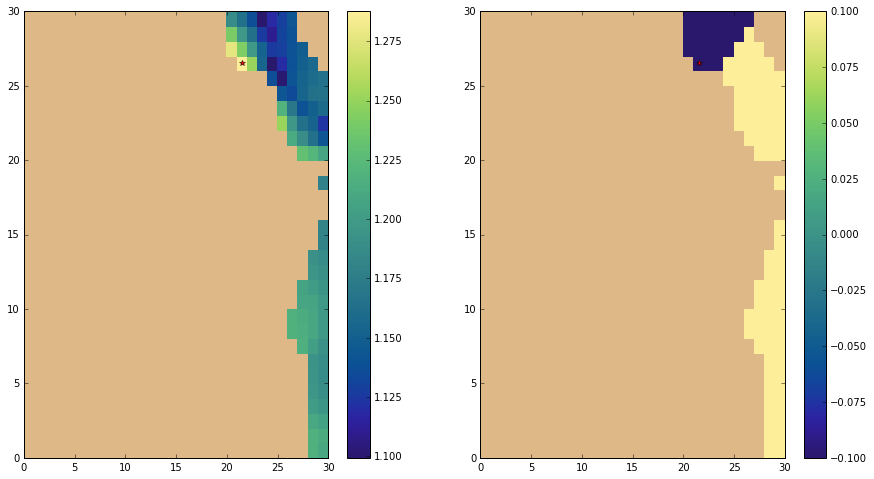

In [414]:
level = 0
fig, axs = plt.subplots(1, 2, figsize=(15,8))
mesh = axs[0].pcolormesh(eta1_masked[800:830,100:130], cmap=cmap)
cbar=fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(eta2_masked[800:830,100:130], cmap=cmap)
cbar=fig.colorbar(mesh, ax=axs[1])
axs[0].plot(121-100+0.5, 826-800+0.5, 'r*')
axs[1].plot(121-100+0.5, 826-800+0.5, 'r*')

In [ ]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(vvel2_masked[level,200:400,120:320]-vvel1_masked[level,200:400,120:320],
                     cmap=cmap, vmax=0.5*vmax, vmin=-0.5*vmax)
cbar=fig.colorbar(mesh, ax=ax)
print (depth[level])

In [ ]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(uvel2_masked[level,350:450,250:350]
                     -uvel1_masked[level,350:450,250:350]
                     ,cmap=cm.oxy,vmax=0.3,vmin=-0.3)
cbar=fig.colorbar(mesh, ax=ax)
ax.set_title('Difference in u velocity')
print (depth[level])

In [ ]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(vvel2_masked[level,350:450,250:350]-vvel1_masked[level,350:450,250:350],
                     cmap=cmap,vmax=0.1, vmin=-0.1)
cbar=fig.colorbar(mesh, ax=ax)
ax.set_title('Difference in V-velocity')
print (depth[level])

#### Surface Height Near the Mouth of Juan de Fuca

This is used to check for smoothness in this boundary condition region

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10), sharey=True)
cmap = plt.get_cmap('plasma_r')
cmap.set_bad('burlywood')
vmax1 = np.max(eta1_masked[:500, :50])
vmax2 = np.max(eta2_masked[:500, :50])
vmin1 = np.min(eta1_masked[:500, :50])
vmin2 = np.min(eta2_masked[:500, :50])
vmax = max(vmax1, vmax2)
vmin = min(vmin1, vmin2)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(
    eta1_masked[360:470, :45], cmap=cmap, vmax=vmax, vmin=vmin)
axs[0].set_title(date1)
cbar = fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(
    eta2_masked[360:470, :45], cmap=cmap, vmax=vmax, vmin=vmin)
axs[1].set_title(date2)
cbar = fig.colorbar(mesh, ax=axs[1])
# third one
#viz_tools.set_aspect(axs[2])
#vmax = np.max(eta2_masked[360:470,:45]-eta1_masked[360:470,:45])
#vmin = np.min(eta2_masked[360:470,:45]-eta1_masked[360:470,:45])
#mesh = axs[2].pcolormesh(eta2_masked[360:470,:45]-eta1_masked[360:470,:45]
#                         ,cmap=cmap,vmax=vmax,vmin=vmin)
#cbar=fig.colorbar(mesh, ax=axs[2])

In [ ]:
klevel=16
fig, axs = plt.subplots(1, 2, figsize=(12,10), sharey=True)
cmap = plt.get_cmap(cm.balance)
cmap.set_bad('burlywood')
vmax1 = np.max(uvel1_masked[klevel,:500, :50])
vmax2 = np.max(uvel2_masked[klevel,:500, :50])
vmin1 = np.min(uvel1_masked[klevel,:500, :50])
vmin2 = np.min(uvel2_masked[klevel, :500, :50])
vmax = max(vmax1,vmax2)
print (vmax)
vmin = min(vmin1,vmin2)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(uvel1_masked[klevel, 360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(uvel2_masked[klevel, 360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,10), sharey=True)
cmap = plt.get_cmap(cm.haline)
cmap.set_bad('burlywood')
vmax1 = np.max(sal1_masked[0])
vmax2 = np.max(sal2_masked[0])
vmin1 = np.min(sal1_masked[0])
vmin2 = np.min(sal2_masked[0])
vmax = max(vmax1,vmax2)
vmin = min(vmin1,vmin2)
vmin = 30.5
vmax = 32
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(sal1_masked[0,360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(sal2_masked[0,360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])

#### In-out Flow from the mouth of Juan de Fuca at 15 m

This is to look at the outflow (should be focussed on the north-side) and inflow (expected, but not actually) weaker at this depth.  Outflow is smoother and better positioned after we corrected barotropic velocity.
                                                                

In [ ]:
level = 15
print('depth ', depth[level], ' m')
im = 300
ix = 476
jx = 100
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
cmap = plt.get_cmap(cm.tempo)
cmap.set_bad('burlywood')
array1 = uvel1_masked[level, im:ix, :jx] - vvel1_masked[level, im:ix, :jx]
array2 = uvel2_masked[level, im:ix, :jx] - vvel2_masked[level, im:ix, :jx]
vmax1 = np.max(array1)
vmax2 = np.max(array2)
vmin1 = np.min(array1)
vmin2 = np.min(array2)
vmax = max(vmax1, vmax2)
vmin = min(vmin1, vmin2)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(array1, cmap=cmap, vmax=vmax, vmin=vmin)
axs[0].set_title(date1)
cbar = fig.colorbar(mesh, ax=axs[0])
#CS=axs[0].contour(array1,0, colors=('black'))
#cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(array2, cmap=cmap, vmax=vmax, vmin=vmin)
axs[1].set_title(date2)
cbar = fig.colorbar(mesh, ax=axs[1])
#CS=axs[1].contour(array2,0, colors=('black'))
#cbar.add_lines(CS)
# third one
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('burlywood')
viz_tools.set_aspect(axs[2])
vmax = np.max(array2 - array1)
vmin = np.min(array2 - array1)
vmax = max(vmax, -vmin)
mesh = axs[2].pcolormesh(array2 - array1, cmap=cmap, vmax=vmax, vmin=-vmax)
cbar = fig.colorbar(mesh, ax=axs[2])

#### Vertical Cross-section of 'East' Velocity running away from Boundary

Not as helpful as I had hoped......

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
speed=0.5
plt.pcolormesh(np.arange(0,20),-depth[:28],uvel1_masked[:28,415,0:20],vmax=speed,vmin=-speed, cmap=cm.curl)
plt.title(date1)
plt.colorbar()
#CS=pylab.contour(np.arange(0,20),-depth[:28],uvel1_masked[:28,415,0:20],(0), colors='black')
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,20),-depth[:28],uvel2_masked[:28,415,0:20],vmax=speed,vmin=-speed, cmap=cm.curl)
plt.title(date2)
plt.colorbar()
#CS=pylab.contour(np.arange(0,20),-depth[:28],uvel2_masked[:28,415,0:20],(0), colors='black')
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,20),-depth[:28],uvel2_masked[:28,415,0:20]-
               uvel1_masked[:28,415,0:20],cmap=cm.curl,vmax=0.25,vmin=-0.25)
plt.colorbar()

#### 'East' Velocity Vertical Cross-section, across the mouth, a bit to the east of the Boundary Forcing

Very clear picture of the estuarine flow in JdF.  Shows freshwater coming in from the ocean in the winter of 2002/2003!  Printed values are the flux through the cross-section.  Negative is inward

In [ ]:
flux1 = np.zeros((40,898))
flux2 = np.zeros((40,898))
ipos = 20
j1 = 355; j2 = 435
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.pcolormesh(np.arange(0,80),-depth[:32],uvel1_masked[:32,j1:j2,ipos]-
               vvel1_masked[:32,j1:j2,ipos],vmin=-1.5, vmax=1.5, cmap=cm.curl)
plt.title(date1)
plt.colorbar()
#CS=pylab.contour(np.arange(0,80),-depth[:32],uvel1_masked[:32,j1:j2,ipos]-
#                 vvel1_masked[:32,j1:j2,ipos],(0), colors='black')
pylab.clabel(CS, fontsize=9, inline=1)
for i in range(j1,j2):
    flux1[:32,i] = deldepth[:32]*uvel1_masked[:32,i,ipos]
    flux2[:32,i] = deldepth[:32]*uvel2_masked[:32,i,ipos]
print (flux1[:32,j1:j2].sum(), flux2[:32,j1:j2].sum())
plt.subplot(1,4,2)
plt.pcolormesh(np.arange(0,80),-depth[:32],uvel2_masked[:32,j1:j2,ipos]
               -vvel2_masked[:32,j1:j2,ipos], vmin=-1.5, vmax=1.5, cmap=cm.curl)
plt.title(date2)
plt.colorbar()
#CS=pylab.contour(np.arange(0,80),-depth[:32],uvel2_masked[:32,j1:j2,ipos]-
#                 vvel2_masked[:32,j1:j2,ipos],(0), colors='black')
pylab.clabel(CS, fontsize=9, inline=1)
plt.subplot(1,4,3)
plt.pcolormesh(np.arange(0,80),-depth[:32],uvel2_masked[:32,j1:j2,ipos]-
               vvel2_masked[:32,j1:j2,ipos]+vvel1_masked[:32,j1:j2,ipos]-
               uvel1_masked[:32,j1:j2,ipos], cmap=cm.curl, vmin=-0.15, vmax=0.15)
plt.colorbar()
plt.subplot(1,4,4)
plt.pcolormesh(np.arange(80),-depth[:32],uvel2_masked[:32,j1:j2,ipos],vmin = -1.5, vmax =1.5, cmap=cm.curl)
plt.title("U only")
plt.colorbar()
#CS=pylab.contour(np.arange(80),-depth[:32],uvel2_masked[:32,j1:j2,ipos],(0), colors='black')
#pylab.clabel(CS, fontsize=9, inline=1)
print (np.max(uvel2_masked[:32,j1:j2,ipos]-
                 vvel2_masked[:32,j1:j2,ipos]))
print (np.min(uvel2_masked[:32,j1:j2,ipos]-
                 vvel2_masked[:32,j1:j2,ipos]))

#### Salinity for the Same Cross-section

In [ ]:
jloc = 5
imin = 350 + 25
imax = 430 + 25
smax = 34.5
smin = 30.5
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.pcolormesh(
    np.arange(0, 80),
    -depth[:34],
    sal1_masked[:34, imin:imax, jloc],
    vmax=smax,
    vmin=smin,
    cmap=cm.haline)
plt.title(date1)
plt.colorbar()
CS = pylab.contour(
    np.arange(0, 80),
    -depth[:34],
    sal1_masked[:34, imin:imax, jloc], (31, 32, 33.5),
    colors='black')
plt.subplot(1, 3, 2)
plt.pcolormesh(
    np.arange(0, 80),
    -depth[:34],
    sal2_masked[:34, imin:imax, jloc],
    vmax=smax,
    vmin=smin,
    cmap=cm.haline)
plt.title(date2)
plt.colorbar()
CS = pylab.contour(
    np.arange(0, 80),
    -depth[:34],
    sal2_masked[:34, imin:imax, jloc], (31, 32, 33.5),
    colors='black')
plt.subplot(1, 3, 3)
plt.pcolormesh(
    np.arange(0, 80),
    -depth[:34],
    sal2_masked[:34, imin:imax, jloc] - sal1_masked[:34, imin:imax, jloc],
    cmap=cm.curl,
    vmax=0.5,
    vmin=-0.5)
plt.colorbar()

#### Maximum Velocities, Maximum Salinity

Tells you which day had stronger tides and whether salinity is increasing or decreasing in JdF

In [ ]:
print (np.max(vvel1_masked), np.max(vvel2_masked), np.min(vvel1_masked), np.min(vvel2_masked))
print (np.unravel_index(np.argmax(vvel1_masked), (40, 898, 398)), 
      np.unravel_index(np.argmax(vvel2_masked), (40, 898, 398)),
      np.unravel_index(np.argmin(vvel1_masked), (40, 898, 398)),
      np.unravel_index(np.argmin(vvel2_masked), (40, 898, 398)),)

In [ ]:
print (np.max(uvel1_masked), np.max(uvel2_masked), np.min(uvel1_masked), np.min(uvel2_masked))
print (np.unravel_index(np.argmax(uvel1_masked), (40, 898, 398)), 
      np.unravel_index(np.argmax(uvel2_masked), (40, 898, 398)),
      np.unravel_index(np.argmin(uvel1_masked), (40, 898, 398)),
      np.unravel_index(np.argmin(uvel2_masked), (40, 898, 398)),)

In [ ]:
print (np.max(sal1_masked), np.max(sal2_masked), np.min(sal1_masked), np.min(sal2_masked))

In [ ]:
print (np.max(temp1_masked), np.max(temp2_masked), np.min(temp1_masked), np.min(temp2_masked))

#### Difference in Salinity in Southern Region at 122 m

Tells you if deep water is mixing (blue) or stratifying (red) between the two time periods.  Blue: usually spring tides, Red: usually neap tides

In [ ]:
level = 29; print (depth[level])
im = 230; ix=480; jx = 350
fig, axs = plt.subplots(1, 1, figsize=(9,5))
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
array1 = sal2_masked[level,im:ix,:jx]-sal1_masked[level,im:ix,:jx]

viz_tools.set_aspect(axs)
#vmax = np.max(array1)
#vmin = np.min(array1)
#vmax = max(vmax,-vmin)
vmax = 0.5; vmin = -0.5
mesh = axs.pcolormesh(array1,cmap=cmap,vmax=vmax,vmin=-vmax)
iv = 113
jv = 283
#axs.plot(jv,iv,'o')
cbar=fig.colorbar(mesh, ax=axs)
print (sal2_masked[level,iv+im,jv]-sal1_masked[level,iv+im,jv])

#### Thalweg Plots: Time 1, Time 2 and Difference

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp1, grid1, mesh_mask_1, 'temperature', cmap=cm.thermal)
ax.set_ylim([450,0])
cbar.set_label('Temperature (oC)')
ax.set_title('Temperature   '+date1);

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp2, grid2, mesh_mask_2, 'temperature', cmap=cm.thermal)
ax.set_ylim([450,0])
cbar.set_label('Temperature [oC]')
ax.set_title('Temperature   '+date2);

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp2-temp1, grid2, mesh_mask_2, 
                           np.arange(-0.8,0.84,0.08), cmap=cm.curl)
ax.set_ylim([450,0])
cbar.set_label('Temperature [oC]')
ax.set_title('Temperature Difference');

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, sal1, grid1, mesh_mask_1, np.arange(30,32.6,0.2), cmap='plasma_r')
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.set_title('Salinity   '+date1);

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, sal2, grid2, mesh_mask_2, np.arange(30,32.6,0.2), cmap='plasma_r')
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.set_title('Salinity   '+date2);

##### Salinity Difference #####

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, sal2-sal1, grid2, mesh_mask_2, np.arange(-0.5,0.51,0.01), cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.set_title('Salinity Difference');

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, uvel2-uvel1, grid2, mesh_mask_2, np.arange(-0.4,0.41,0.02), cmap=cm.curl)
#cbar = vis.contour_thalweg(ax, sal2-sal1, bathy, lons, lats, mesh_mask_1, 'gdept_0', 
#                           np.arange(-0.1,0.11,0.02), cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('U Velocity [m/s]')
ax.set_title('U Velocity Difference');

#### Plots in Island Region

"East" velocity generally has 2-grid point noise, but ssh should not unless we are unstable.

In [ ]:
jmin=250; jmax=350; imin=250; imax=350
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(uvel1_masked[0,jmin:jmax,imin:imax])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(uvel2_masked[0,jmin:jmax,imin:imax])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(uvel2_masked[0,jmin:jmax,imin:imax]-uvel1_masked[0,jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr, vmax=0.25, vmin=-0.25)
plt.colorbar()

In [ ]:
jmin=250; jmax=350; imin=250; imax=350
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(eta1_masked[jmin:jmax,imin:imax])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(eta2_masked[jmin:jmax,imin:imax])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(eta2_masked[jmin:jmax,imin:imax]-eta1_masked[jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr, vmax=0.02, vmin=-0.02)
plt.colorbar()

In [ ]:
level = 27; print (depth[level])
jmin=260; jmax=360; imin=230; imax=330
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(sal1_masked[level,jmin:jmax,imin:imax],vmax=32.5,vmin=29)
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(sal2_masked[level,jmin:jmax,imin:imax],vmax=32.5,vmin=29)
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(sal2_masked[level,jmin:jmax,imin:imax]-sal1_masked[level,jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr,vmax=0.2,vmin=-0.2)
plt.colorbar()

#### Vertical Velocity

In [ ]:
fW1 = NC.Dataset(resultsloc1 + name1 + 'W' + extra1 + '.nc', 'r')
wvel1 = fW1.variables['vovecrtz'][time1, :]
wmask1 = 1 - mesh_mask_1['tmask'][:]
wvel1_masked = np.ma.array(wvel1, mask=wmask1)
print(time1)
fW2 = NC.Dataset(resultsloc2 + name2 + 'W' + extra2 + '.nc', 'r')
wvel2 = fW2.variables['vovecrtz'][time2, :]
wmask2 = 1 - mesh_mask_2['tmask'][:]
wvel2_masked = np.ma.array(wvel2, mask=wmask2)
print(wvel2.shape, time2)

In [ ]:
print (np.max(wvel1_masked), np.max(wvel2_masked), np.min(wvel1_masked), np.min(wvel2_masked))
print (np.unravel_index(np.argmax(wvel1_masked), (40, 898, 398)), 
      np.unravel_index(np.argmax(wvel2_masked), (40, 898, 398)),
      np.unravel_index(np.argmin(wvel1_masked), (40, 898, 398)),
      np.unravel_index(np.argmin(wvel2_masked), (40, 898, 398)),)

In [ ]:
kmax = 13
print (np.max(wvel1_masked[:kmax]), np.max(wvel2_masked[:kmax]), np.min(wvel1_masked[:kmax]), np.min(wvel2_masked[:kmax]))
print (np.unravel_index(np.argmax(wvel1_masked[:kmax]), (kmax, 898, 398)), 
      np.unravel_index(np.argmax(wvel2_masked[:kmax]), (kmax, 898, 398)),
      np.unravel_index(np.argmin(wvel1_masked[:kmax]), (kmax, 898, 398)),
      np.unravel_index(np.argmin(wvel2_masked[:kmax]), (kmax, 898, 398)),)
print(deldepth[kmax], deldepth[kmax]/np.max(wvel2_masked[:kmax]))

In [ ]:
level = 15
jmin=250; jmax=350; imin=250; imax=350
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(wvel1_masked[level,jmin:jmax,imin:imax])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(wvel2_masked[level,jmin:jmax,imin:imax])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(wvel2_masked[level,jmin:jmax,imin:imax]-wvel1_masked[level,jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr)
plt.colorbar()

#### "Rich's Current" -- Cross-sections through VENUS Stations

In [ ]:
jval = 424; imin=240; imax=320; id=34
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),vmax=0.2,vmin=0.)
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2),vmax=0.2,vmin=0.)
plt.title(date2)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2)
                                                 -np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),cmap=plt.cm.bwr, 
              vmax=0.05, vmin=-0.05)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()
# northsouth velocity only
plt.subplot(4,3,4)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel1_masked[:id,jval,imin:imax], 
               vmax=0.5, vmin=-0.5, cmap=plt.cm.bwr)
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,5)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax],
              vmax=0.5, vmin=-0.5, cmap=plt.cm.bwr)
plt.title(date2+'V velocity')
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,6)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax]
                                                 -vvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr,
              vmax=0.05, vmin=-0.05)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

# EAST-WEST velocity only
plt.subplot(4,3,7)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],uvel1_masked[:id,jval,imin:imax], 
               vmax = 0.3, vmin=-0.3, cmap=plt.cm.bwr)
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,8)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],uvel2_masked[:id,jval,imin:imax], 
               vmax = 0.3, vmin=-0.3, cmap=plt.cm.bwr)
plt.title(date2)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,9)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],uvel2_masked[:id,jval,imin:imax]
                                                 -uvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr,
              vmax=0.05, vmin=-0.05)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

# salinity
plt.subplot(4,3,10)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],sal1_masked[:id,jval,imin:imax],
               vmax = 32, vmin = 29, cmap=plt.cm.magma_r)
plt.colorbar()
CS=pylab.contour(np.arange(imin,imax),-depth[:id],sal1_masked[:id,jval,imin:imax],(30.5,30.7,30.8), colors='black')
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')

plt.subplot(4,3,11)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],sal2_masked[:id,jval,imin:imax],
               vmax = 32, vmin = 29, cmap=plt.cm.magma_r)
plt.colorbar()
CS=pylab.contour(np.arange(imin,imax),-depth[:id],sal2_masked[:id,jval,imin:imax],(30.5,30.7,30.8), colors='black')
plt.title(date2)
#plt.plot(282,-170,'*',267,-300,'*')


plt.subplot(4,3,12)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],sal2_masked[:id,jval,imin:imax]
                                                 -sal1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr,
                                                 vmax=0.5,vmin=-0.5)
#plt.plot(282,-170,'*',267,-300,'*')
cbar=plt.colorbar()
CS=pylab.contour(np.arange(imin,imax),-depth[:id],
                 sal2_masked[:id,jval,imin:imax]-sal1_masked[:id,jval, imin:imax],(0.15, 0.2, 0.25), colors='black')

cbar.add_lines(CS)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
level = 1
print (depth[level])
jmin = 240 + 10
jmax = 320 + 5     
imin = 420 - 35 
imax = 420 + 55
u, v = viz_tools.unstagger(uvel1_masked[level,imin:imax,jmin:jmax], vvel1_masked[level,imin:imax,jmin:jmax])
themax = max(np.max(u), -np.min(u))
print (date1, themax)
ax[0].pcolormesh(np.arange(jmax-jmin-1)/3.-0.5/3., np.arange(imax-imin-1)/3.-0.5/3., u, cmap='BrBG', vmax=themax, vmin=-themax)
ax[0].quiver(u[::3,::3], v[::3,::3], pivot='mid', color='r')
ax[0].set_xlim((0, (jmax-jmin)/3.-1))
ax[0].set_ylim((0, (imax-imin)/3.-1))

u, v = viz_tools.unstagger(uvel2_masked[level,imin:imax,jmin:jmax], vvel2_masked[level,imin:imax,jmin:jmax])
themax2 = max(np.max(u), -np.min(u))
print (date2, themax2)
ax[1].pcolormesh(np.arange(jmax-jmin-1)/3.-0.5/3., np.arange(imax-imin-1)/3.-0.5/3., u, cmap='BrBG', vmax=themax, vmin=-themax)
ax[1].quiver(u[::3,::3], v[::3,::3], pivot='mid', color='r')
ax[1].set_xlim((0, (jmax-jmin)/3.-1))
ax[1].set_ylim((0, (imax-imin)/3.-1))

u, v = viz_tools.unstagger(uvel2_masked[level,imin:imax,jmin:jmax]-uvel1_masked[level,imin:imax,jmin:jmax], 
                           vvel2_masked[level,imin:imax,jmin:jmax]-vvel1_masked[level,imin:imax,jmin:jmax])
themax = max(np.max(u), -np.min(u))
print ('diff u', themax)
ax[2].pcolormesh(np.arange(jmax-jmin-1)/3.-0.5/3., np.arange(imax-imin-1)/3.-0.5/3., v, cmap='bwr', vmax=themax, vmin=-themax)
ax[2].quiver(u[::3,::3], v[::3,::3], pivot='mid', color='r')
ax[2].set_xlim((0, (jmax-jmin)/3.-1))
ax[2].set_ylim((0, (imax-imin)/3.-1))
themax = max(np.max(v), -np.min(v))
print ('diff v', themax)

In [ ]:
jmin = 240 + 45
jmax = 320 + 5     
imin = 420 - 25 
imax = 420 + 35
level = 3
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
vmax = np.max(vvel1_masked[level, imin:imax, jmin:jmax])
mesh=axs[0].pcolormesh(uvel1_masked[level, imin:imax, jmin:jmax], cmap='BrBG', vmax=vmax, vmin=-vmax )
fig.colorbar(mesh, ax=axs[0])
mesh=axs[1].pcolormesh(uvel2_masked[level, imin:imax, jmin:jmax], cmap='BrBG', vmax=vmax, vmin=-vmax )
fig.colorbar(mesh, ax=axs[1])
mesh=axs[2].pcolormesh(uvel2_masked[level, imin:imax, jmin:jmax]-
                  uvel1_masked[level, imin:imax, jmin:jmax], cmap=cm.curl, vmax=0.5*vmax, vmin=-0.5*vmax )
fig.colorbar(mesh, ax=axs[2])

In [ ]:
trajsX, trajsY = np.loadtxt('/ocean/sallen/allen/research/MEOPAR/Ariane/aug13/traj.out')
print (trajsX)

In [ ]:
#plt.rc('xtick', labelsize=18)
#plt.rc('ytick', labelsize=20)
fig, ax = plt.subplots(1,1, figsize=(14,18))
level = 7
step = 1
print (depth[level])
jmin = 240 + 10
jmax = 320 + 5     
imin = 420 - 35 
imax = 420 + 55
x_slice = slice(jmin, jmax)
xarr = np.arange(jmin, jmax)
y_slice = slice(imin, imax)
yarr = np.arange(imin, imax)
xarr3 = np.arange(jmin, jmax-1, step)
yarr3 = np.arange(imin, imax-1, step)
print (xarr3.shape)
print (u[::step, ::step].shape)

u, v = viz_tools.unstagger(uvel2_masked[level, y_slice, x_slice]-uvel1_masked[level, y_slice, x_slice], 
                           vvel2_masked[level, y_slice, x_slice]-vvel1_masked[level, y_slice, x_slice])
themax = max(np.max(v), -np.min(v))

mesh=ax.pcolormesh(xarr, yarr, u, cmap='BrBG', vmax=themax, vmin=-themax)
u, v = viz_tools.unstagger(uvel2_masked[level, y_slice, x_slice], 
                           vvel2_masked[level, y_slice, x_slice])                   
ax.quiver(xarr3, yarr3, u[::step, ::step], v[::step, ::step], pivot='mid', color='r')
u, v = viz_tools.unstagger(uvel1_masked[level, y_slice, x_slice], vvel1_masked[level, y_slice, x_slice])                   
ax.quiver(xarr3, yarr3, u[::step, ::step], v[::step, ::step], pivot='mid', color='k')                   
cbar = fig.colorbar(mesh, ax=ax, label="Cross Strait Velocity (m s$^{-1}$)")
cbar.ax.yaxis.label.set_font_properties(font_manager.FontProperties(size=22))
viz_tools.plot_land_mask(ax, grid2, xslice=np.arange(jmin,jmax), yslice=np.arange(imin,imax))
#ax.set_title('Daily averaged velocity at 100 m and 24hr particle track', fontsize=22)
#ax.set_ylabel('Model Grid Points', fontsize=20)
#ax.set_xlabel('Model Grid Points', fontsize=20)
ax.tick_params(axis='x', bottom='off', labelbottom='off')
ax.tick_params(axis='y', left='off', labelleft='off')
#ax.plot(trajsX, trajsY, 'o', c='saddlebrown', markersize=16)



In [ ]:
id = 40
plt.semilogy(sal1_masked[:id, 424, 267], depth[:id], 'b*-',
             sal2_masked[:id, 424, 267], depth[:id], 'r')
#plt.semilogy(sal1_masked[:id, 450, 250], depth[:id], 'g*',
#             sal2_masked[:id, 450, 250], depth[:id], 'm')
plt.gca().invert_yaxis()

#### Northern Boundary

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
jpos = 894
plt.pcolormesh(np.arange(0,31),-depth[:34],sal1_masked[:34,jpos,32:63],vmax=33.6,vmin=29.5)
plt.title(date1)
plt.colorbar()
CS=pylab.contour(np.arange(0,31),-depth[:34],sal1_masked[:34,jpos,32:63],(31,32,33.5), colors='black')
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,31),-depth[:34],sal2_masked[:34,jpos,32:63],vmax=33.6,vmin=29.5, cmap=cm.curl)
plt.title(date2)
plt.colorbar()
CS=pylab.contour(np.arange(0,31),-depth[:34],sal2_masked[:34,jpos,32:63],(31,32,33.5), colors='black')
plt.subplot(1,3,3)
plt.title("Salinity Comparison")
plt.pcolormesh(np.arange(0,31),-depth[:34],sal2_masked[:34,jpos,32:63]-
               sal1_masked[:34,jpos,32:63],cmap=plt.cm.bwr,vmax=0.05,vmin=-0.05)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
vmin = -0.1
vmax = 0.1
jpos = 894
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel1_masked[:34,jpos,32:63], cmap=plt.cm.bwr, vmin=vmin, vmax=vmax)
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,31),-depth[:34], vvel2_masked[:34,jpos,32:63], cmap=plt.cm.bwr,vmin=vmin, vmax=vmax)
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,31),-depth[:34], vvel2_masked[:34,jpos,32:63]-
               vvel1_masked[:34,jpos,32:63],cmap=plt.cm.bwr,vmax=0.05,vmin=-0.05)
plt.colorbar()

In [ ]:
# note: these are twos!
vbarotropic1 = np.average(vvel2_masked[:,879:898,32:63],axis=0)
print (vbarotropic1.shape)
vbaroclinic1 = vvel2_masked[:,879:898, 32:63]- vbarotropic1
print (vbaroclinic1.shape)
ubarotropic1 = np.average(uvel2_masked[:,879:898,32:63],axis=0)
ubaroclinic1 = uvel2_masked[:,879:898, 32:63]- ubarotropic1
plt.pcolormesh(vbarotropic1, cmap='viridis', vmin=-0.2, vmax=0.2)
plt.colorbar()

In [ ]:
plt.plot(vbarotropic1[16], 'o-')
plt.plot(ubarotropic1[17], 'o-')
plt.plot(eta1[896,32:63]/5, 'o-')

In [ ]:
jpos = 895
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel1_masked[:34,jpos,32:63])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel2_masked[:34,jpos,32:63])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel2_masked[:34,jpos,32:63]-
               vvel1_masked[:34,jpos,32:63],cmap=plt.cm.bwr)
plt.colorbar()

In [ ]:
jpos = 895
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(0,31),-depth[:34],vbaroclinic1[:34,jpos-879])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel2_masked[:34,jpos,32:63])
#plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel2_masked[:34,jpos,32:63]-
               vbaroclinic1[:34,jpos-879],cmap=plt.cm.bwr)
plt.colorbar()

In [ ]:
id = 4
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pcolormesh(vbaroclinic1[id])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(ubaroclinic1[id])
plt.colorbar()

In [ ]:
id = 30
print (ubaroclinic1.shape)
plt.figure(figsize=(15,10))
yr = np.arange(0,ubaroclinic1.shape[1])
print (yr.shape)
xr = np.arange(0+0.5,ubaroclinic1.shape[2]+0.5)
xrr, yrr = np.meshgrid(xr,yr)
plt.quiver(xrr, yrr, ubaroclinic1[id],np.zeros((ubaroclinic1.shape[1],ubaroclinic1.shape[2])),color='b', scale = 4)
yr = np.arange(0+0.5,vbaroclinic1.shape[1]+0.5)
xr = np.arange(0,vbaroclinic1.shape[2])
xrr, yrr = np.meshgrid(xr,yr)
plt.quiver(xrr, yrr, np.zeros((vbaroclinic1.shape[1],vbaroclinic1.shape[2])),vbaroclinic1[id],color='r', scale = 4)


In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.pcolormesh(sal1_masked[0,879:899,32:62])
plt.colorbar()
plt.subplot(2,3,4)
plt.pcolormesh(sal1_masked[30,879:898,32:62])
plt.colorbar()
plt.subplot(2,3,3)
plt.pcolormesh(sal2_masked[0,879:898,32:62]-sal1_masked[0,879:898,32:62])
plt.colorbar()
plt.subplot(2,3,2)
plt.pcolormesh(sal2_masked[0,879:899,32:62])
plt.colorbar()
plt.subplot(2,3,5)
plt.pcolormesh(sal2_masked[30,879:898,32:62])
plt.colorbar()
plt.subplot(2,3,6)
plt.pcolormesh(sal2_masked[30,879:898,32:62]-sal1_masked[30,879:898,32:62])
plt.colorbar()
print (sal1_masked[0, 893:,42], sal1[0,:,42].shape)
print (sal2_masked[0, 893:,42])
print (vvel1_masked[0, 893:,42])
print (vvel2_masked[0, 893:,42])
print (eta1_masked[893:,42])
print (eta2_masked[893:,42])
print (uvel1_masked[0, 400, :3])
print (uvel2_masked[0, 400, :3])
print (sal1_masked[0, 400, :3])
print (sal2_masked[0, 400, :3])
print (vvel1_masked[0, 400, :3])
print (vvel2_masked[0, 400, :3])
print (eta1_masked[400, :3])
print (eta2_masked[400, :3])

In [ ]:
plt.figure(figsize=(9,9))
level = 0
jmin = 32
jmax = 62
imin = 879
imax = 898
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax],color='b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')
print (np.sqrt(uvel1_masked[level,893,49]**2 + vvel1_masked[level,893,49]**2), 
        np.sqrt(uvel2_masked[level,893,49]**2 + vvel2_masked[level,893,49]**2))

In [ ]:
imax = 70
jmin = 880
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.pcolormesh(eta1_masked[jmin:898,32:imax])
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(eta2_masked[jmin:898,32:imax])
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(eta2_masked[jmin:898,32:imax]-eta1_masked[jmin:898,32:imax],cmap=plt.cm.bwr)
plt.colorbar()

In [ ]:
imax = 70
jmin = 880
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.pcolormesh(sal1_masked[0, jmin:898,32:imax], cmap=cm.haline)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(sal2_masked[0, jmin:898,32:imax], cmap=cm.haline)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(sal2_masked[0, jmin:898,32:imax]-sal1[0, jmin:898,32:imax],cmap=plt.cm.bwr)
plt.colorbar()

#### Maximum Velocity Region

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.pcolormesh(vvel2_masked[0,730:896,30:150])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(vvel2_masked[0,730:896,30:150]-vvel1_masked[0,730:896,30:150])
plt.colorbar()

#### Toba Inlet ####

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
imin = 760; imax = 790
jmin = 220; jmax = 320
mesh = axs[0].pcolormesh(sal1_masked[0, imin:imax, jmin:jmax], cmap=cm.haline, vmax=24, vmin=8)
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(sal2_masked[0, imin:imax, jmin:jmax], cmap=cm.haline, vmax=24, vmin=8)
fig.colorbar(mesh, ax=axs[1])
vmax = 1.2
vmin = -vmax
mesh = axs[2].pcolormesh(sal2_masked[0, imin:imax, jmin:jmax] - sal1_masked[0, imin:imax, jmin:jmax], 
                         cmap=cm.curl, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=axs[2])

#### East Vancouver Island Current

In [ ]:
jval = 500; imin=210; imax=290; id=36
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),vmax=0.25,vmin=0.)
plt.title(date1)
plt.colorbar()

plt.subplot(2,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2),vmax=0.25,vmin=0.)
plt.title(date2)
plt.colorbar()

plt.subplot(2,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2)
                                                 -np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),cmap=plt.cm.bwr,
                                                 vmax = 0.2, vmin=-0.2)
plt.colorbar()
# northsouth velocity only
plt.subplot(2,3,4)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel1_masked[:id,jval,imin:imax],vmax = 0.2, vmin = -0.2)
plt.title(date1)
plt.colorbar()

plt.subplot(2,3,5)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax],vmax=0.2, vmin=-0.2)
plt.title(date2)
plt.colorbar()

plt.subplot(2,3,6)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax]
                                                 -vvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.2, vmin = -0.2)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,12))
level = 0
print (depth[level])
jmin = 210
jmax = 290
imin = 500-40
imax = 500+40
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax],color='b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')


In [ ]:
plt.figure(figsize=(12,12))
level = 25
print (depth[level])
jmin = 210
jmax = 290
imin = 500-40
imax = 500+40
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax], color = 'b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')


In [ ]:
plt.figure(figsize=(12,12))
level = 22
print (depth[level])
jmin = 100
jmax = 200
imin = 700-40
imax = 700+40
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax], color = 'b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')


In [ ]:
jval = 800; imin=120; imax=140; id=36
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel1_masked[:id,jval,imin:imax],vmax = 0.1, vmin = -0.1)
plt.title(date1)
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax],vmax=0.1, vmin=-0.1)
plt.title(date2)
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax]
                                                 -vvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.05, vmin = -0.05)
plt.colorbar()

In [ ]:
meanu1 = sum(fU1.variables['vozocrtx'][0:10,:])
mu = meanu1 == 0
meanu1_masked = np.ma.array(meanu1,mask=mu)
meanv1 = sum(fV1.variables['vomecrty'][0:10,:])
mv = meanv1 == 0
meanv1_masked = np.ma.array(meanv1,mask=mv)

In [ ]:
meanu2 = sum(fU2.variables['vozocrtx'][0:10,:])
mu = meanu2 == 0
meanu2_masked = np.ma.array(meanu2,mask=mu)
meanv2 = sum(fV2.variables['vomecrty'][0:10,:])
mv = meanv2 == 0
meanv2_masked = np.ma.array(meanv2,mask=mv)

In [ ]:
jval = 810; imin=120; imax=140; id=30
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv1_masked[:id,jval,imin:imax],vmax = 0.25, vmin = -0.25)
plt.title('Jan 31-Feb 9')
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax],vmax=0.25, vmin=-0.25)
plt.title('Feb 10 - Feb 19')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax]
                                                 -0.1*meanv1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.1, vmin = -0.1)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,12))
level1 = 0
level2 = 0
jmin = 100
jmax = 160
imin = 800-40
imax = 800+40
#plt.quiver(0.5*meanu1_masked[level1,imin:imax,jmin:jmax]+0.5*meanu1_masked[level1,imin:imax,jmin-1:jmax-1],
#           0.5*meanv1_masked[level1,imin:imax,jmin:jmax]+0.5*meanv1_masked[level1,imin-1:imax-1,jmin:jmax],color='r')
#plt.quiver(0.5*meanu1_masked[level2,imin:imax,jmin:jmax]+0.5*meanu1_masked[level2,imin:imax,jmin-1:jmax-1],
#           0.5*meanv1_masked[level2,imin:imax,jmin:jmax]+0.5*meanv1_masked[level2,imin-1:imax-1,jmin:jmax],color='b')
plt.quiver(meanu1_masked[level2,imin:imax,jmin:jmax],meanv1_masked[level2,imin:imax,jmin:jmax],color = 'g')

In [ ]:
plt.figure(figsize=(12,12))
level1 = 4
level2 = 20
print depth[level]
jmin = 100
jmax = 160
imin = 800-40
imax = 800+40
plt.pcolormesh(meanv1_masked[level1,imin:imax,jmin:jmax])
plt.colorbar()

In [ ]:
jval = 800-40+13; imin=110; imax=130; id=25
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv1_masked[:id,jval,imin:imax],vmax = 2, vmin = -2)
plt.title('Jan 31-Feb 9')
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax],vmax=2, vmin=-2)
plt.title('Feb 10 - Feb 19')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax]
                                                 -0.1*meanv1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.5, vmin = -0.5)
plt.colorbar()
print 0.58*meanv2_masked[5,jval,120]*500, 'm3/s'

In [ ]:
jval = 800-40+16; imin=110; imax=130; id=27
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv1_masked[:id,jval,imin:imax],vmax = 2, vmin = -2)
plt.title('Jan 31-Feb 9')
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax],vmax=2, vmin=-2)
plt.title('Feb 10 - Feb 19')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax]
                                                 -0.1*meanv1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.5, vmin = -0.5)
plt.colorbar()

In [ ]:
zlevel = 28
jmin = 180
jmax = 230
imin = 350-40
imax = 350+40
y_slice = np.arange(imin, imax)
x_slice = np.arange(jmin, jmax)
t = time1

arrow_step = 1
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ugrid = fU1.variables['vozocrtx']
vgrid = fV1.variables['vomecrty']

ugrid_tzyx = np.ma.masked_values(ugrid[t,zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t,zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
viz_tools.set_aspect(ax)
quiver=ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx, v_tzyx, scale = 0.05, color='blue', pivot='mid')
viz_tools.plot_land_mask(ax, '../../../nemo-forcing/grid/bathy_meter_SalishSea2.nc', 
                         xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(date1+u'depth \u2248 {d:.2f} m'.format(d=depth[zlevel]))
ax.quiverkey(quiver, 190, 370, 0.005, '0.005 m/s', coordinates='data', color='white', labelcolor='white')

In [ ]:
level = 0
print depth[level]

plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax], color = 'b')
viz_tools.plot_land_mask(ax, '../../../nemo-forcing/grid/bathy_meter_SalishSea2.nc')